# **FOUNDATION OF DATA ANALYTICS PROJECT 2**

In [1]:
!pip install ts2vg

     |████████████████████████████████| 1.0 MB 4.6 MB/s 


In [2]:
!pip install igraph

     |████████████████████████████████| 3.1 MB 4.2 MB/s 


In [3]:
!pip install pycairo
!pip install cairocffi

     |████████████████████████████████| 340 kB 4.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  ERROR: Failed building wheel for pycairo
Failed to build pycairo
ERROR: Could not build wheels for pycairo which use PEP 517 and cannot be installed directly
     |████████████████████████████████| 88 kB 2.9 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.3.0-py3-none-any.whl size=89668 sha256=df06a351c90ecf91312551286b7edb0becfbabc6194fdb6f324dce8ba5a820b8
  Stored in directory: /root/.cache/pip/wheels/4e/ca/e1/5c8a9692a27f639a07c949044bec943f26c81cd53d3805319f
Successfully built cairocffi


In [4]:
!pip install mako

     |████████████████████████████████| 78 kB 2.9 MB/s 


**Importing important libraries required for the project**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os

from ts2vg import HorizontalVG
from ts2vg import NaturalVG

**Accessing the dataset from Google Drive Folder**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
%cd '/content/drive/MyDrive/Project2_Dataset/'

/content/drive/MyDrive/Project2_Dataset


In [8]:
import pandas as pd
import os
dir = '/content/drive/MyDrive/Project2_Dataset/'

**Displaying all the files that are in .csv format in the folder**

In [9]:
for accelerometer_filename in glob.iglob('/content/drive/MyDrive/Project2_Dataset/**/*.csv',
                           recursive = True):
    print(accelerometer_filename)

/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_walking_csv/acc_walking_upperarm.csv
/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_walking_csv/acc_walking_chest.csv
/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_walking_csv/acc_walking_thigh.csv
/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_walking_csv/acc_walking_head.csv
/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_walking_csv/acc_walking_shin.csv
/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_walking_csv/acc_walking_forearm.csv
/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_walking_csv/acc_walking_waist.csv
/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_climbingup_csv/acc_climbingup_head.csv
/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_climbingup_csv/acc_climbingup_upperarm.csv
/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_climbingup_csv/acc_climbingup_thigh.csv
/content/drive/MyDrive/Project2_Dataset/Subject 3/acc_climbingup_csv/acc_climbingup_forearm.csv
/

**Applying Horizontal Visibility Graph in X-Direction**

In [10]:
task1_table_hvg_X = pd.DataFrame(columns=["Method","Subject", "Accelerometer Axis","Average Degree","Network Diameter","Average Path Length","Activity", "Activity Body Part"])

print("Accelerometer Reading in X-direction")

for accelerometer_filename in glob.iglob('/content/drive/MyDrive/Project2_Dataset/**/*.csv',recursive = True):
  df = pd.read_csv(accelerometer_filename,header = 0)
  hvg = HorizontalVG()
  hvg.build(df['attr_x'][1000:2024])
  hvg_g = hvg.as_igraph()
  Average_Degree =  np.mean(hvg_g.degree())
  Network_Diameter = hvg_g.diameter()
  Average_Path_Length = hvg_g.average_path_length()

  task1_table_hvg_X = task1_table_hvg_X.append({'Method':"HVG", 'Subject':accelerometer_filename.split('.')[0].split('/')[-3],'Accelerometer Axis':"X",'Average Degree': Average_Degree, 'Network Diameter': Network_Diameter, 'Average Path Length': Average_Path_Length,'Activity': accelerometer_filename.split('.')[0].split('_')[-2], 'Activity Body Part':accelerometer_filename.split('.')[0].split('_')[-1]}, ignore_index=True)


# os.path.basename(accelerometer_filename)}

Accelerometer Reading in X-direction


In [11]:
task1_hvg_df_X = pd.DataFrame(task1_table_hvg_X)
task1_hvg_df_X

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Activity Body Part
0,HVG,Subject 3,X,3.970703,31,13.987987,walking,upperarm
1,HVG,Subject 3,X,3.955078,27,12.852334,walking,chest
2,HVG,Subject 3,X,3.964844,17,7.946594,walking,thigh
3,HVG,Subject 3,X,3.945312,37,15.984902,walking,head
4,HVG,Subject 3,X,3.953125,28,12.267429,walking,shin
...,...,...,...,...,...,...,...,...
498,HVG,Subject 1,X,3.945312,33,14.193501,climbingdown,forearm
499,HVG,Subject 1,X,3.878906,58,21.653424,climbingdown,waist
500,HVG,Subject 1,X,3.951172,32,14.510884,climbingdown,chest
501,HVG,Subject 1,X,3.923828,38,13.302396,climbingdown,head


**Applying Horizontal Visibility Graph in Z-Direction**

In [12]:
task1_table_hvg_Y = pd.DataFrame(columns=["Method","Subject", "Accelerometer Axis","Average Degree","Network Diameter","Average Path Length","Activity", "Activity Body Part"])

print("Accelerometer Reading in Y-direction") 

for accelerometer_filename in glob.iglob('/content/drive/MyDrive/Project2_Dataset/**/*.csv',recursive = True):
  df = pd.read_csv(accelerometer_filename,header = 0)
  hvg = HorizontalVG()
  hvg.build(df['attr_y'][1000:2024])
  hvg_g = hvg.as_igraph()
  Average_Degree = np.mean(hvg_g.degree())
  Network_Diameter =  hvg_g.diameter()
  Average_Path_Length = hvg_g.average_path_length()

  task1_table_hvg_Y = task1_table_hvg_Y.append({'Method':"HVG", 'Subject':accelerometer_filename.split('.')[0].split('/')[-3],'Accelerometer Axis':"Y",'Average Degree': Average_Degree, 'Network Diameter': Network_Diameter, 'Average Path Length': Average_Path_Length,'Activity': accelerometer_filename.split('.')[0].split('_')[-2], 'Activity Body Part':accelerometer_filename.split('.')[0].split('_')[-1]}, ignore_index=True)


# os.path.basename(accelerometer_filename)}

Accelerometer Reading in Y-direction


In [13]:
task1_hvg_df_Y = pd.DataFrame(task1_table_hvg_Y)
task1_hvg_df_Y

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Activity Body Part
0,HVG,Subject 3,Y,3.947266,40,16.189915,walking,upperarm
1,HVG,Subject 3,Y,3.962891,30,13.825513,walking,chest
2,HVG,Subject 3,Y,3.968750,23,10.419011,walking,thigh
3,HVG,Subject 3,Y,3.960938,32,13.636493,walking,head
4,HVG,Subject 3,Y,3.861328,72,26.079586,walking,shin
...,...,...,...,...,...,...,...,...
498,HVG,Subject 1,Y,3.937500,47,17.833013,climbingdown,forearm
499,HVG,Subject 1,Y,3.960938,26,11.051870,climbingdown,waist
500,HVG,Subject 1,Y,3.947266,28,12.518642,climbingdown,chest
501,HVG,Subject 1,Y,3.949219,25,10.861815,climbingdown,head


**Applying Horizontal Visibility Graph in Z-Direction**

In [14]:
task1_table_hvg_Z = pd.DataFrame(columns=["Method","Subject", "Accelerometer Axis","Average Degree","Network Diameter","Average Path Length","Activity", "Activity Body Part"])

print("Accelerometer Reading in Z-direction")

for accelerometer_filename in glob.iglob('/content/drive/MyDrive/Project2_Dataset/**/*.csv',recursive = True):
  df = pd.read_csv(accelerometer_filename,header = 0) 
  hvg = HorizontalVG()
  hvg.build(df['attr_z'][1000:2024])
  hvg_g = hvg.as_igraph()
  Average_Degree = np.mean(hvg_g.degree())
  Network_Diameter = hvg_g.diameter()
  Average_Path_Length = hvg_g.average_path_length()

  task1_table_hvg_Z = task1_table_hvg_Z.append({'Method':"HVG", 'Subject':accelerometer_filename.split('.')[0].split('/')[-3],'Accelerometer Axis':"Z",'Average Degree': Average_Degree, 'Network Diameter': Network_Diameter, 'Average Path Length': Average_Path_Length,'Activity': accelerometer_filename.split('.')[0].split('_')[-2], 'Activity Body Part':accelerometer_filename.split('.')[0].split('_')[-1]}, ignore_index=True)


# os.path.basename(accelerometer_filename)}

Accelerometer Reading in Z-direction


In [15]:
task1_hvg_df_Z = pd.DataFrame(task1_table_hvg_Z)
task1_hvg_df_Z

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Activity Body Part
0,HVG,Subject 3,Z,3.935547,32,13.934600,walking,upperarm
1,HVG,Subject 3,Z,3.943359,25,8.444413,walking,chest
2,HVG,Subject 3,Z,3.955078,24,9.592064,walking,thigh
3,HVG,Subject 3,Z,3.958984,29,11.454418,walking,head
4,HVG,Subject 3,Z,3.962891,19,9.251520,walking,shin
...,...,...,...,...,...,...,...,...
498,HVG,Subject 1,Z,3.941406,37,13.239900,climbingdown,forearm
499,HVG,Subject 1,Z,3.960938,19,9.386931,climbingdown,waist
500,HVG,Subject 1,Z,3.968750,23,9.949156,climbingdown,chest
501,HVG,Subject 1,Z,3.931641,48,18.122953,climbingdown,head


**Horizontal Visibility Graph Method for three directions**

In [16]:
task1_hvg_df = pd.concat([task1_hvg_df_X,task1_hvg_df_Y,task1_hvg_df_Z])
task1_hvg_df

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Activity Body Part
0,HVG,Subject 3,X,3.970703,31,13.987987,walking,upperarm
1,HVG,Subject 3,X,3.955078,27,12.852334,walking,chest
2,HVG,Subject 3,X,3.964844,17,7.946594,walking,thigh
3,HVG,Subject 3,X,3.945312,37,15.984902,walking,head
4,HVG,Subject 3,X,3.953125,28,12.267429,walking,shin
...,...,...,...,...,...,...,...,...
498,HVG,Subject 1,Z,3.941406,37,13.239900,climbingdown,forearm
499,HVG,Subject 1,Z,3.960938,19,9.386931,climbingdown,waist
500,HVG,Subject 1,Z,3.968750,23,9.949156,climbingdown,chest
501,HVG,Subject 1,Z,3.931641,48,18.122953,climbingdown,head


### **NATURAL VISIBILITY GRAPH METHOD**

**Applying Natural Visibility Graph in X-Direction**

In [17]:
task1_table_nvg_X = pd.DataFrame(columns=["Method","Subject", "Accelerometer Axis","Average Degree","Network Diameter","Average Path Length","Activity", "Activity Body Part"])

print("Accelerometer Reading in X-Direction")
for accelerometer_filename in glob.iglob('/content/drive/MyDrive/Project2_Dataset/**/*.csv',recursive = True):
  df = pd.read_csv(accelerometer_filename,header = 0)
  nvg = NaturalVG()
  nvg.build(df['attr_x'][1000:2024])
  nvg_g = nvg.as_igraph()
  Average_Degree =  np.mean(nvg_g.degree())
  Network_Diameter = nvg_g.diameter()
  Average_Path_Length = nvg_g.average_path_length()

  task1_table_nvg_X = task1_table_nvg_X.append({'Method':"NVG", 'Subject':accelerometer_filename.split('.')[0].split('/')[-3],'Accelerometer Axis':"X",'Average Degree': Average_Degree, 'Network Diameter': Network_Diameter, 'Average Path Length': Average_Path_Length,'Activity': accelerometer_filename.split('.')[0].split('_')[-2], 'Activity Body Part':accelerometer_filename.split('.')[0].split('_')[-1]}, ignore_index=True)


# os.path.basename(accelerometer_filename)}

Accelerometer Reading in X-Direction


In [18]:
task1_nvg_df_X = pd.DataFrame(task1_table_nvg_X)
task1_nvg_df_X

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Activity Body Part
0,NVG,Subject 3,X,11.599609,9,4.672963,walking,upperarm
1,NVG,Subject 3,X,12.933594,11,4.573461,walking,chest
2,NVG,Subject 3,X,7.611328,10,4.449425,walking,thigh
3,NVG,Subject 3,X,15.201172,9,4.157993,walking,head
4,NVG,Subject 3,X,10.343750,17,6.901057,walking,shin
...,...,...,...,...,...,...,...,...
498,NVG,Subject 1,X,10.445312,12,4.960038,climbingdown,forearm
499,NVG,Subject 1,X,12.882812,42,15.874836,climbingdown,waist
500,NVG,Subject 1,X,15.609375,16,6.598815,climbingdown,chest
501,NVG,Subject 1,X,10.019531,13,5.308571,climbingdown,head


**Applying Natural Visibility Graph in Y-Direction**

In [19]:
task1_table_nvg_Y = pd.DataFrame(columns=["Method","Subject", "Accelerometer Axis","Average Degree","Network Diameter","Average Path Length","Activity", "Activity Body Part"])

print("Accelerometer Reading in Y-Direction")
for accelerometer_filename in glob.iglob('/content/drive/MyDrive/Project2_Dataset/**/*.csv',recursive = True):
  df = pd.read_csv(accelerometer_filename,header = 0)
  nvg = NaturalVG()
  nvg.build(df['attr_y'][1000:2024])
  nvg_g = nvg.as_igraph()
  Average_Degree =  np.mean(nvg_g.degree())
  Network_Diameter = nvg_g.diameter()
  Average_Path_Length = nvg_g.average_path_length()

  task1_table_nvg_Y = task1_table_nvg_Y.append({'Method':"NVG", 'Subject':accelerometer_filename.split('.')[0].split('/')[-3],'Accelerometer Axis':"Y",'Average Degree': Average_Degree, 'Network Diameter': Network_Diameter, 'Average Path Length': Average_Path_Length,'Activity': accelerometer_filename.split('.')[0].split('_')[-2], 'Activity Body Part':accelerometer_filename.split('.')[0].split('_')[-1]}, ignore_index=True)


# os.path.basename(accelerometer_filename)}

Accelerometer Reading in Y-Direction


In [20]:
task1_nvg_df_Y = pd.DataFrame(task1_table_nvg_Y)
task1_nvg_df_Y

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Activity Body Part
0,NVG,Subject 3,Y,12.496094,13,5.447812,walking,upperarm
1,NVG,Subject 3,Y,17.685547,9,4.431776,walking,chest
2,NVG,Subject 3,Y,9.304688,13,5.994370,walking,thigh
3,NVG,Subject 3,Y,17.652344,8,3.987957,walking,head
4,NVG,Subject 3,Y,11.472656,61,21.837497,walking,shin
...,...,...,...,...,...,...,...,...
498,NVG,Subject 1,Y,12.083984,11,4.597041,climbingdown,forearm
499,NVG,Subject 1,Y,10.125000,10,4.385963,climbingdown,waist
500,NVG,Subject 1,Y,14.087891,10,4.261784,climbingdown,chest
501,NVG,Subject 1,Y,13.814453,10,4.723846,climbingdown,head


**Applying Natural Visibility Graph in Z-Direction**

In [21]:
task1_table_nvg_Z = pd.DataFrame(columns=["Method","Subject", "Accelerometer Axis","Average Degree","Network Diameter","Average Path Length","Activity", "Activity Body Part"])

print("Accelerometer Reading in Z-Direction")
for accelerometer_filename in glob.iglob('/content/drive/MyDrive/Project2_Dataset/**/*.csv',recursive = True):
  df = pd.read_csv(accelerometer_filename,header = 0)
  nvg = NaturalVG()
  nvg.build(df['attr_z'][1000:2024])
  nvg_g = nvg.as_igraph()
  Average_Degree =  np.mean(nvg_g.degree())
  Network_Diameter = nvg_g.diameter()
  Average_Path_Length = nvg_g.average_path_length()

  task1_table_nvg_Z = task1_table_nvg_Z.append({'Method':"NVG", 'Subject':accelerometer_filename.split('.')[0].split('/')[-3],'Accelerometer Axis':"Z",'Average Degree': Average_Degree, 'Network Diameter': Network_Diameter, 'Average Path Length': Average_Path_Length,'Activity': accelerometer_filename.split('.')[0].split('_')[-2], 'Activity Body Part':accelerometer_filename.split('.')[0].split('_')[-1]}, ignore_index=True)


# os.path.basename(accelerometer_filename)}

Accelerometer Reading in Z-Direction


In [22]:
task1_nvg_df_Z = pd.DataFrame(task1_table_nvg_Z)
task1_nvg_df_Z

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Activity Body Part
0,NVG,Subject 3,Z,15.230469,11,4.678979,walking,upperarm
1,NVG,Subject 3,Z,8.498047,13,4.867174,walking,chest
2,NVG,Subject 3,Z,8.195312,10,4.571437,walking,thigh
3,NVG,Subject 3,Z,15.613281,8,4.239665,walking,head
4,NVG,Subject 3,Z,9.443359,9,4.052461,walking,shin
...,...,...,...,...,...,...,...,...
498,NVG,Subject 1,Z,12.474609,10,4.263013,climbingdown,forearm
499,NVG,Subject 1,Z,9.427734,9,4.147941,climbingdown,waist
500,NVG,Subject 1,Z,9.562500,9,4.428011,climbingdown,chest
501,NVG,Subject 1,Z,12.644531,10,4.611320,climbingdown,head


**Natural Visbility Graph Method for all three directions**

In [23]:
task1_nvg_df = pd.concat([task1_nvg_df_X,task1_nvg_df_Y,task1_nvg_df_Z])
task1_nvg_df

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Activity Body Part
0,NVG,Subject 3,X,11.599609,9,4.672963,walking,upperarm
1,NVG,Subject 3,X,12.933594,11,4.573461,walking,chest
2,NVG,Subject 3,X,7.611328,10,4.449425,walking,thigh
3,NVG,Subject 3,X,15.201172,9,4.157993,walking,head
4,NVG,Subject 3,X,10.343750,17,6.901057,walking,shin
...,...,...,...,...,...,...,...,...
498,NVG,Subject 1,Z,12.474609,10,4.263013,climbingdown,forearm
499,NVG,Subject 1,Z,9.427734,9,4.147941,climbingdown,waist
500,NVG,Subject 1,Z,9.562500,9,4.428011,climbingdown,chest
501,NVG,Subject 1,Z,12.644531,10,4.611320,climbingdown,head


### **COMBINED TABLE FOR HORIZONTAL VISIBILITY GRAPH AND NATURAL VISIBILITY GRAPH**

In [24]:
task1_final_df = pd.concat([task1_hvg_df, task1_nvg_df])
task1_final_df

,Method,Subject,Accelerometer Axis,Average Degree,Network Diameter,Average Path Length,Activity,Activity Body Part
0,HVG,Subject 3,X,3.970703,31,13.987987,walking,upperarm
1,HVG,Subject 3,X,3.955078,27,12.852334,walking,chest
2,HVG,Subject 3,X,3.964844,17,7.946594,walking,thigh
3,HVG,Subject 3,X,3.945312,37,15.984902,walking,head
4,HVG,Subject 3,X,3.953125,28,12.267429,walking,shin
...,...,...,...,...,...,...,...,...
498,NVG,Subject 1,Z,12.474609,10,4.263013,climbingdown,forearm
499,NVG,Subject 1,Z,9.427734,9,4.147941,climbingdown,waist
500,NVG,Subject 1,Z,9.562500,9,4.428011,climbingdown,chest
501,NVG,Subject 1,Z,12.644531,10,4.611320,climbingdown,head


### **SCATTER PLOTS FOR HORIZONTAL VISIBILITY GRAPH**

**SCATTER PLOT : WALKING VS RUNNING**

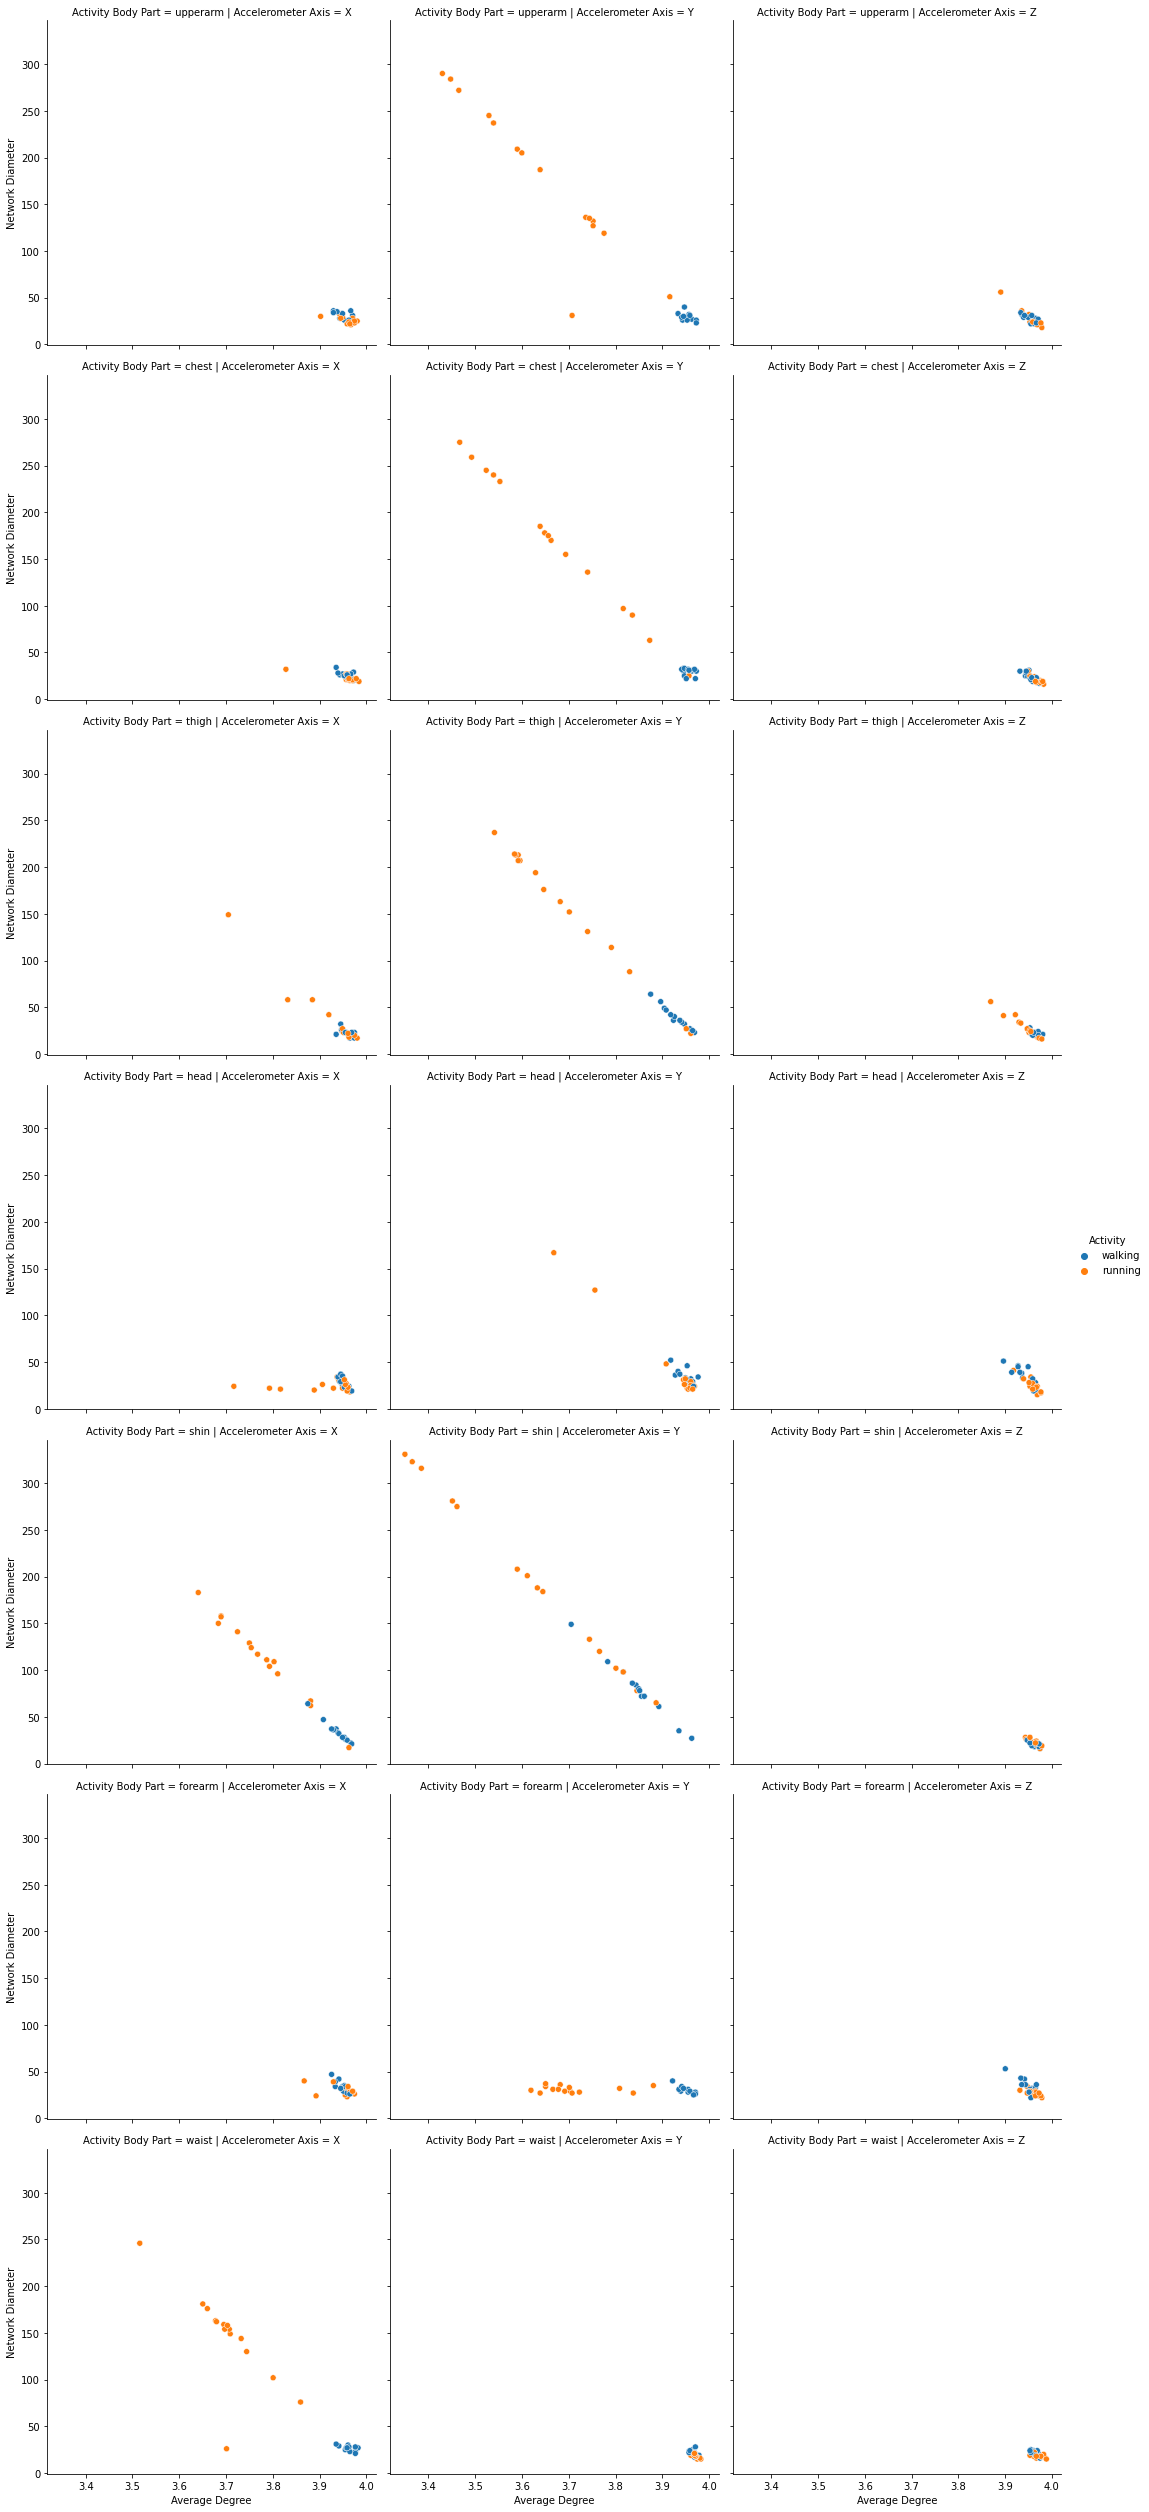

In [25]:
task1_hvg_df_walk_run = task1_hvg_df[(task1_hvg_df['Activity'] == "walking") | (task1_hvg_df['Activity'] == "running") ]


sns.relplot(data = task1_hvg_df_walk_run, x="Average Degree", y="Network Diameter", col="Accelerometer Axis", row="Activity Body Part", hue="Activity", kind="scatter")

**SCATTER PLOT : CLIMBING UP VS CLIMBING DOWN**

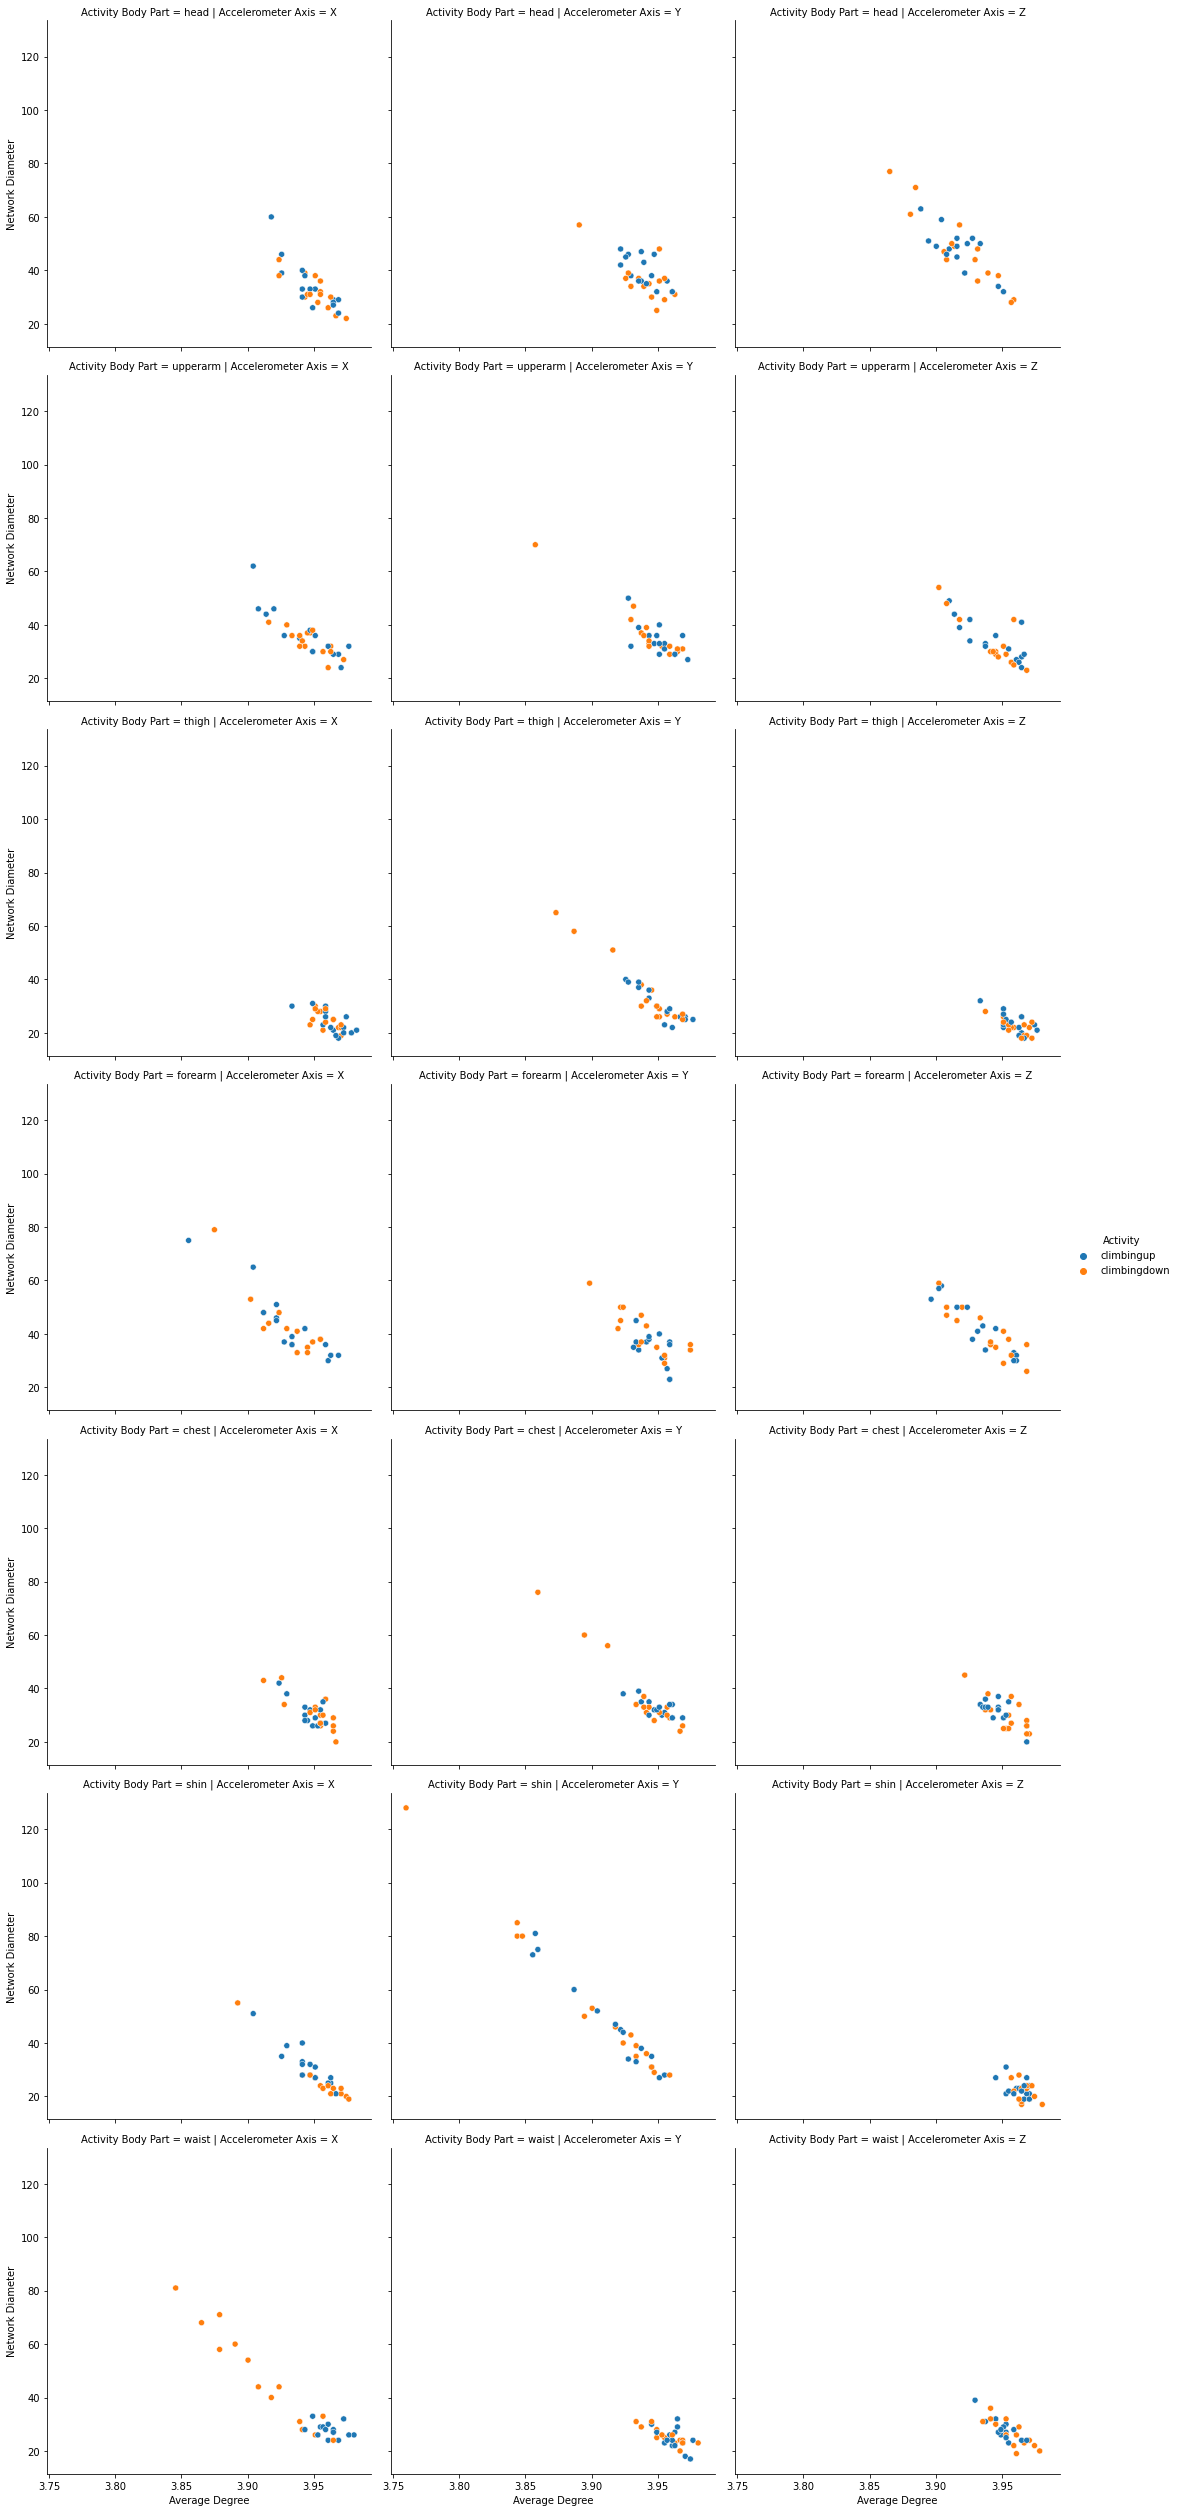

In [26]:
task1_hvg_df_up_down = task1_hvg_df[(task1_hvg_df['Activity'] == "climbingup") | (task1_hvg_df['Activity'] == "climbingdown")]

sns.relplot(data = task1_hvg_df_up_down, x="Average Degree", y="Network Diameter", col = "Accelerometer Axis", row="Activity Body Part", hue="Activity", kind="scatter")

### **SCATTER PLOTS FOR NATURAL VISIBILITY GRAPH**

**SCATTER PLOT : WALKING VS RUNNING**

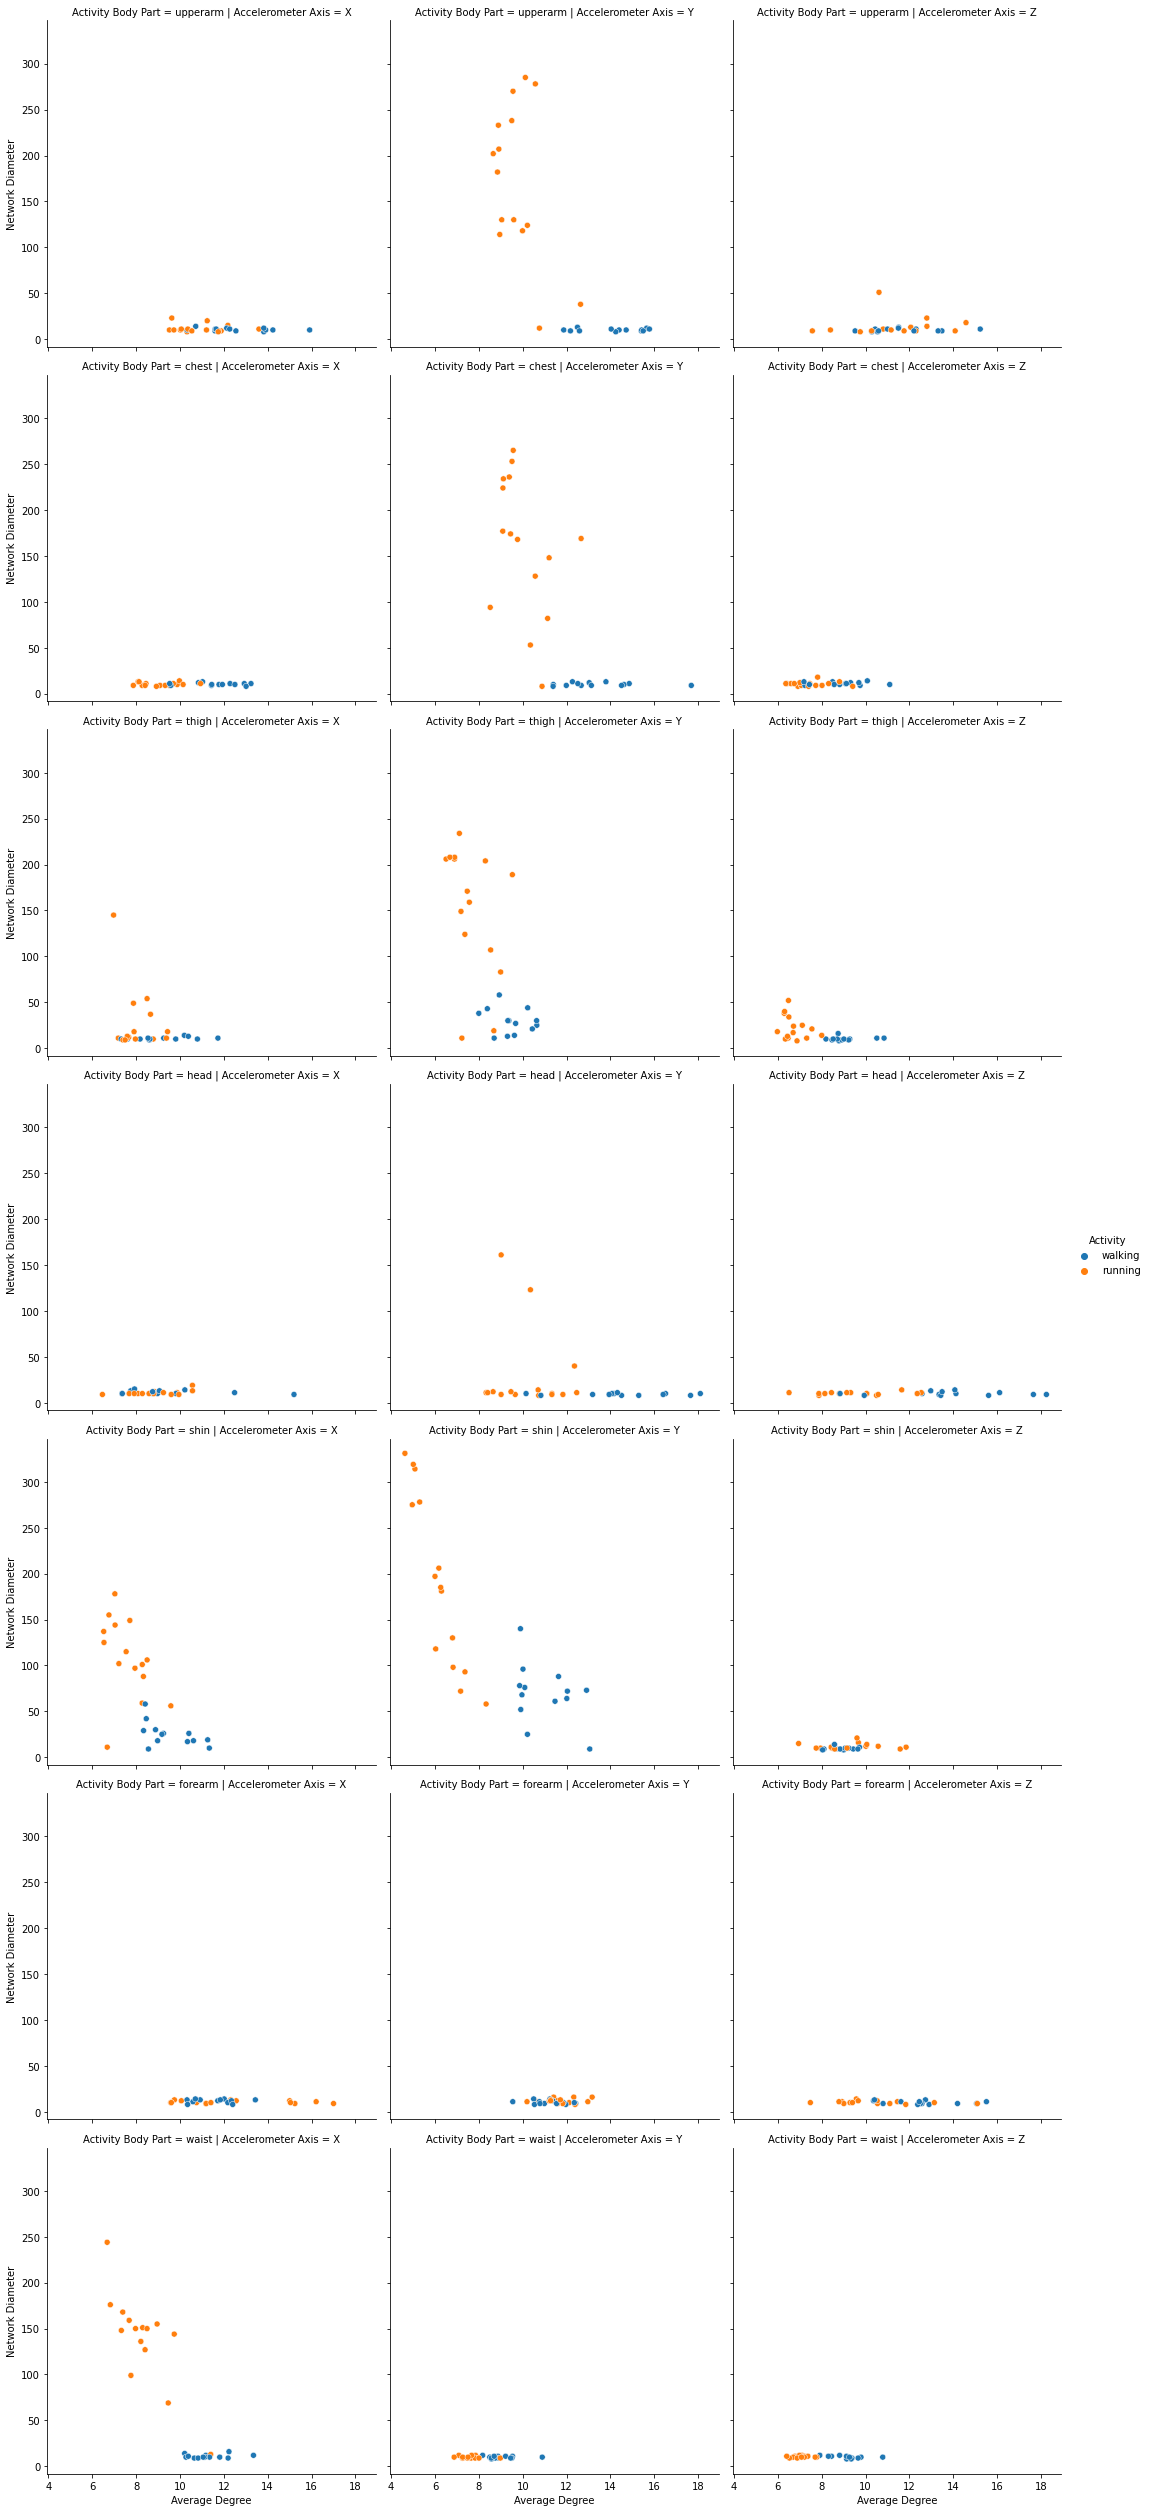

In [27]:
task1_nvg_df_walk_run = task1_nvg_df[(task1_nvg_df['Activity'] == "walking") | (task1_nvg_df['Activity'] == "running") ]


sns.relplot(data = task1_nvg_df_walk_run, x="Average Degree", y="Network Diameter", col="Accelerometer Axis", row="Activity Body Part", hue="Activity", kind="scatter")

**SCATTER PLOT : CLIMBING UP VS CLIMBING DOWN**

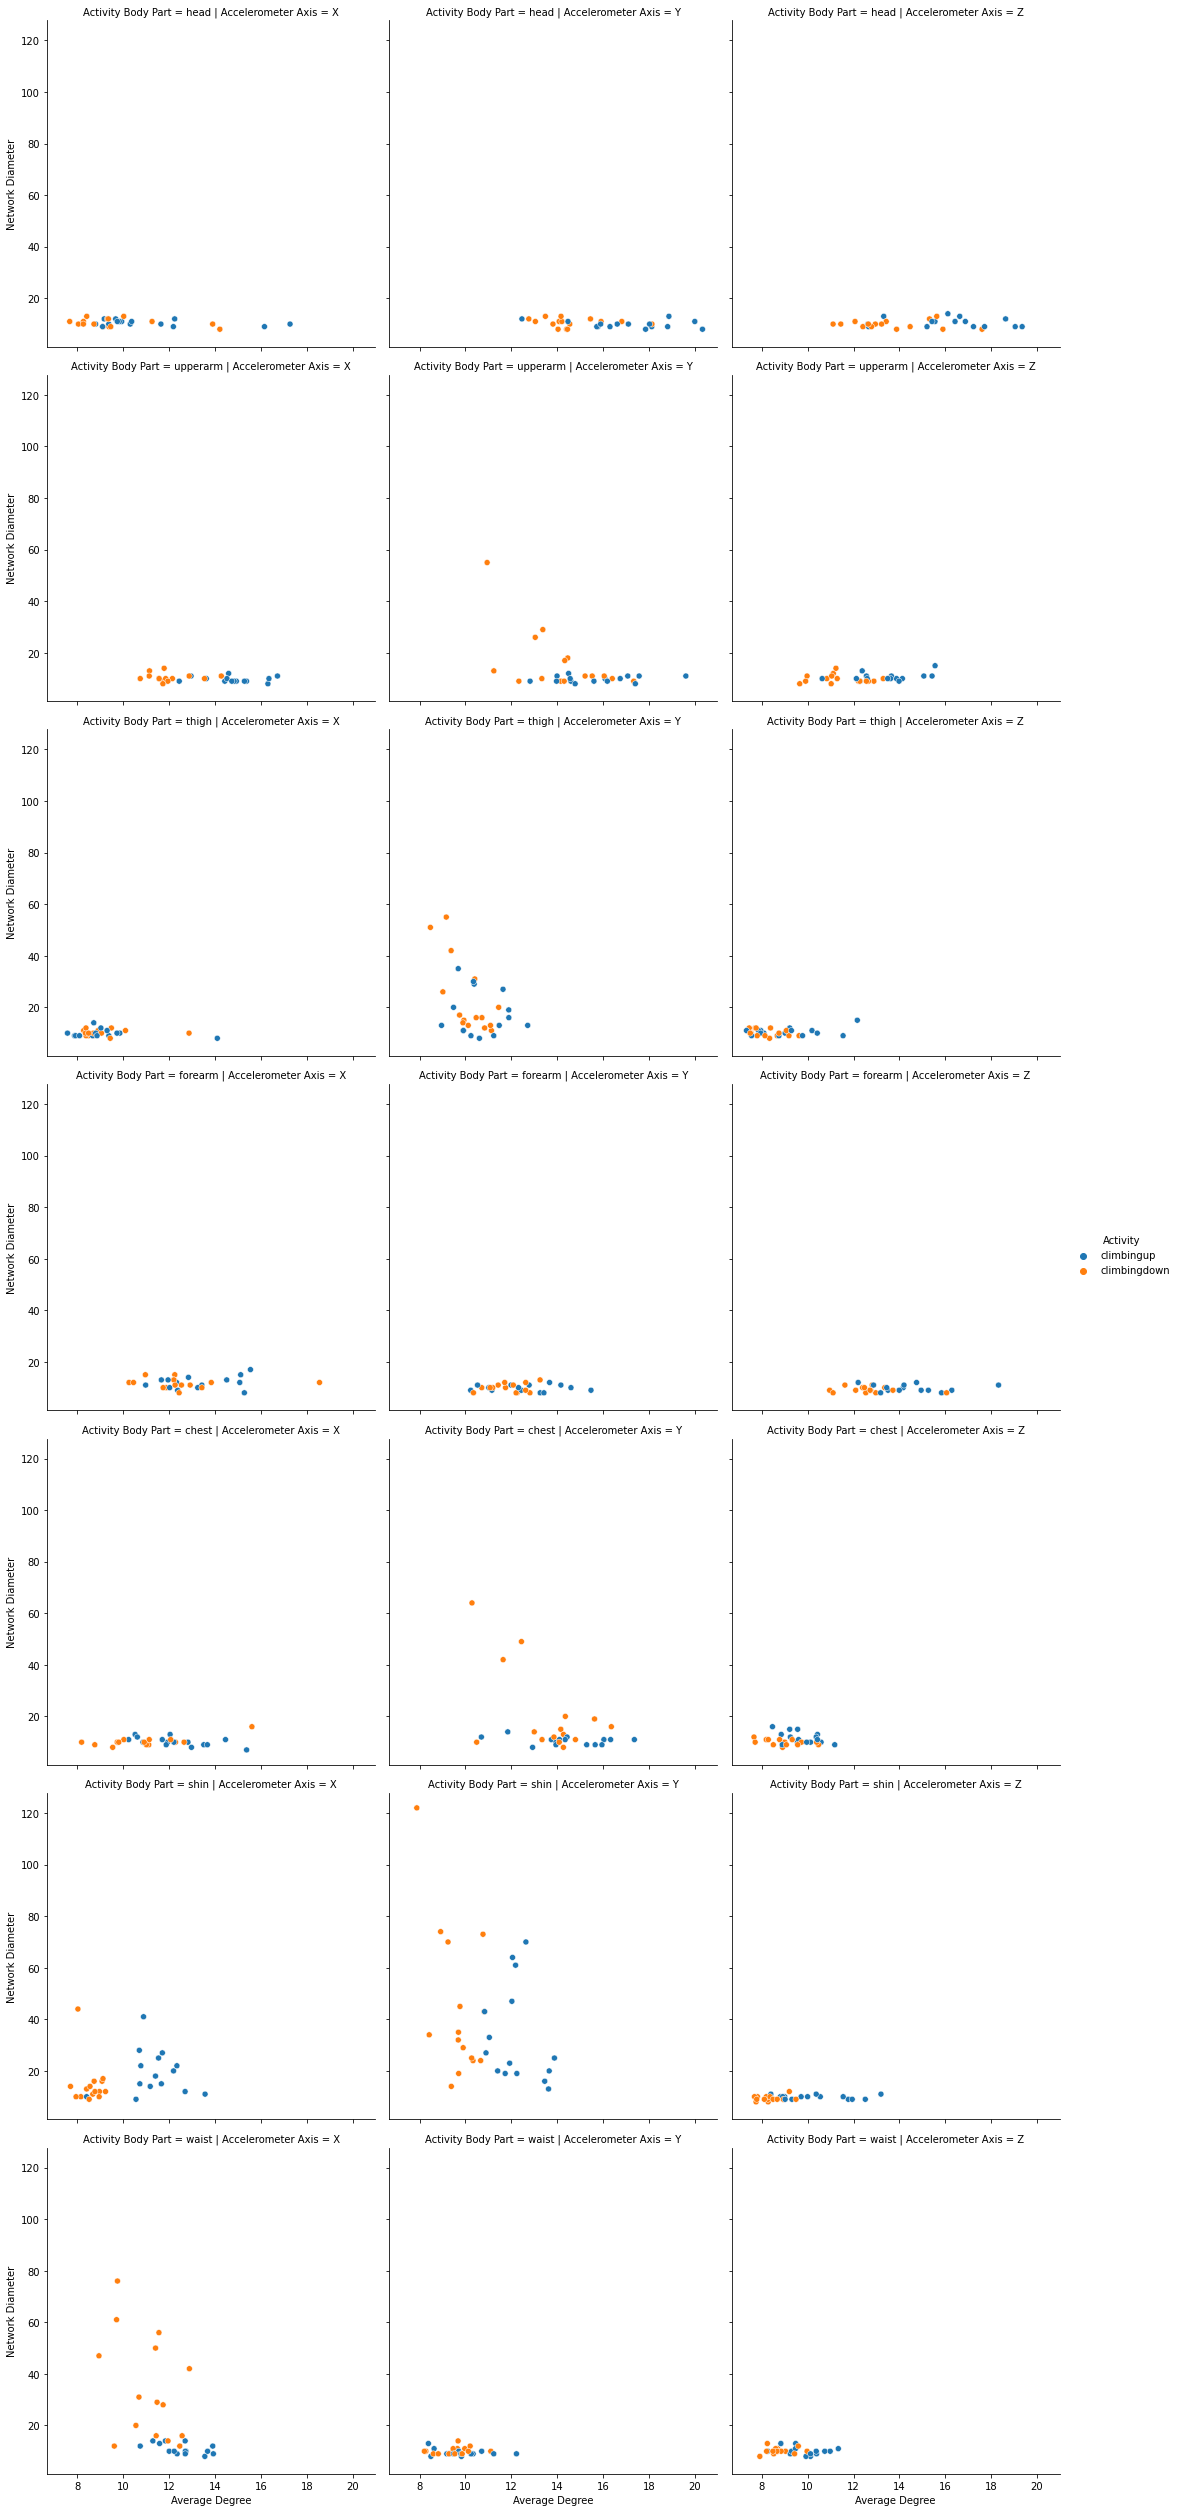

In [28]:
task1_nvg_df_up_down = task1_nvg_df[(task1_nvg_df['Activity'] == "climbingup") | (task1_nvg_df['Activity'] == "climbingdown") ]


sns.relplot(data = task1_nvg_df_up_down, x="Average Degree", y="Network Diameter", col = "Accelerometer Axis", row="Activity Body Part", hue="Activity", kind="scatter")

# **TASK 2: PERMUTATION ENTROPY AND COMPLEXITY**

In [29]:
''' This module has essential functions supporting
fast and effective computation of permutation entropy and
its different variations.'''
import numpy as np


def s_entropy(freq_list):
    ''' This function computes the shannon entropy of a given frequency distribution.
    USAGE: shannon_entropy(freq_list)
    ARGS: freq_list = Numeric vector representing the frequency distribution
    OUTPUT: A numeric value representing shannon's entropy'''
    freq_list = [element for element in freq_list if element != 0]
    sh_entropy = 0.0
    for freq in freq_list:
        sh_entropy += freq * np.log(freq)
    sh_entropy = -sh_entropy
    return(sh_entropy)

def ordinal_patterns(ts, embdim, embdelay):
    ''' This function computes the ordinal patterns of a time series for a given embedding dimension and embedding delay.
    USAGE: ordinal_patterns(ts, embdim, embdelay)
    ARGS: ts = Numeric vector representing the time series, embdim = embedding dimension (3<=embdim<=7 prefered range), embdelay =  embdding delay
    OUPTUT: A numeric vector representing frequencies of ordinal patterns'''
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    permutation = np.argsort(partition)
    idx = _hash(permutation)

    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = (idx == i).sum()
    return list(counts[counts != 0].astype(int))

def _hash(x):
    m, n = x.shape
    if n == 1:
        return np.zeros(m)
    return np.sum(np.apply_along_axis(lambda y: y < x[:, 0], 0, x), axis=1) * np.math.factorial(n-1) + _hash(x[:, 1:]) 
    

def p_entropy(op):
    ordinal_pat = op
    max_entropy = np.log(len(ordinal_pat))
    p = np.divide(np.array(ordinal_pat), float(sum(ordinal_pat)))
    return(s_entropy(p)/max_entropy)

def complexity(op):
    ''' This function computes the complexity of a time series defined as: Comp_JS = Q_o * JSdivergence * pe
    Q_o = Normalizing constant
    JSdivergence = Jensen-Shannon divergence
    pe = permutation entopry
    ARGS: ordinal pattern'''
    pe = p_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (s_entropy(temp_op_prob2) - 0.5 * s_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

def weighted_ordinal_patterns(ts, embdim, embdelay):
    m, t = embdim, embdelay
    x = ts if isinstance(ts, np.ndarray) else np.array(ts) 

    tmp = np.zeros((x.shape[0], m))
    for i in range(m):
        tmp[:, i] = np.roll(x, i*t)
    partition = tmp[(t*m-1):, :] 
    xm = np.mean(partition, axis=1)
    weight = np.mean((partition - xm[:, None])**2, axis=1)
    permutation = np.argsort(partition)
    idx = _hash(permutation)
    counts = np.zeros(np.math.factorial(m))
    for i in range(counts.shape[0]):
        counts[i] = sum(weight[i == idx])

    return list(counts[counts != 0]) 

### **PERMUTATION ENTROPY AND COMPLEXITY IN X-DIRECTION**

In [30]:
task2_pe_op_x = pd.DataFrame(columns=["npe","ncomp","Embedded Dimension","Embedded Delay","Signal Length"])
task2_df_X = pd.DataFrame(columns=["Subject", "Accelerometer Axis","Signal Length", "Embedded Dimension", "Embedded Delay", "Permutation Entropy","Complexity", "Activity","Activity Body Part",])

for task2 in glob.iglob('/content/drive/MyDrive/Project2_Dataset/**/*.csv',recursive = True):
  df_task2 = pd.read_csv(task2, header = 0)
  df_task2.columns = ['id','attr_time','attr_x','attr_y','attr_z']
  i = [1024, 2048, 4096]
  for j in i:
    ts = df_task2['attr_x'][0:j]
    embdim = [3,4,5,6]
    embdelay = [1,2,3]
    for m in embdim:
      for t in embdelay:
        op = ordinal_patterns(ts,m,t)
        npe = p_entropy(op)
        ncomp = complexity(op)
        task2_pe_op_x = task2_pe_op_x.append({'npe':npe, "ncomp":ncomp,'Embedded Dimension':m,'Embedded Delay':t,'Signal Length':j}, ignore_index=True)
  
        task2_df_X = task2_df_X.append({'Subject': task2.split('.')[0].split('/')[-3], 'Signal Length':j,'Accelerometer Axis':"X",'Embedded Dimension': m,'Embedded Delay': t, 'Permutation Entropy': npe,'Complexity':ncomp,'Activity': task2.split('.')[0].split('_')[-2], 'Activity Body Part':task2.split('.')[0].split('_')[-1]}, ignore_index=True)

task2_pe_op_x

,npe,ncomp,Embedded Dimension,Embedded Delay,Signal Length
0,0.806662,0.152717,3.0,1.0,1024.0
1,0.925387,0.066664,3.0,2.0,1024.0
2,0.962143,0.035479,3.0,3.0,1024.0
3,0.737758,0.230789,4.0,1.0,1024.0
4,0.881544,0.135471,4.0,2.0,1024.0
...,...,...,...,...,...
18103,0.859730,0.191330,5.0,2.0,4096.0
18104,0.923874,0.122891,5.0,3.0,4096.0
18105,0.744169,0.284641,6.0,1.0,4096.0
18106,0.866413,0.221907,6.0,2.0,4096.0


In [31]:
task2_df_X

,Subject,Accelerometer Axis,Signal Length,Embedded Dimension,Embedded Delay,Permutation Entropy,Complexity,Activity,Activity Body Part
0,Subject 3,X,1024,3,1,0.806662,0.152717,walking,upperarm
1,Subject 3,X,1024,3,2,0.925387,0.066664,walking,upperarm
2,Subject 3,X,1024,3,3,0.962143,0.035479,walking,upperarm
3,Subject 3,X,1024,4,1,0.737758,0.230789,walking,upperarm
4,Subject 3,X,1024,4,2,0.881544,0.135471,walking,upperarm
...,...,...,...,...,...,...,...,...,...
18103,Subject 1,X,4096,5,2,0.859730,0.191330,climbingdown,upperarm
18104,Subject 1,X,4096,5,3,0.923874,0.122891,climbingdown,upperarm
18105,Subject 1,X,4096,6,1,0.744169,0.284641,climbingdown,upperarm
18106,Subject 1,X,4096,6,2,0.866413,0.221907,climbingdown,upperarm


### **PERMUTATION ENTROPY AND COMPLEXITY IN Y-DIRECTION**

In [32]:
task2_pe_op_y = pd.DataFrame(columns=["npe","ncomp","Embedded Dimension","Embedded Delay","Signal Length"])
task2_df_Y = pd.DataFrame(columns=["Subject", "Accelerometer Axis","Signal Length","Embedded Dimension","Embedded Delay", "Permutation Entropy","Complexity", "Activity","Activity Body Part"])

for task2 in glob.iglob('/content/drive/MyDrive/Project2_Dataset/**/*.csv',recursive = True):
  df_task2 = pd.read_csv(task2, header = 0)
  df_task2.columns = ['id','attr_time','attr_x','attr_y','attr_z']
  i = [1024, 2048, 4096]
  for j in i:
    ts = df_task2['attr_y'][0:j]
    embdim = [3,4,5,6]
    embdelay = [1,2,3]
    for m in embdim:
      for t in embdelay:
        op = ordinal_patterns(ts,m,t)
        npe = p_entropy(op)
        ncomp = complexity(op)
        task2_pe_op_y = task2_pe_op_y.append({'npe':npe, "ncomp":ncomp,'Embedded Dimension':m,'Embedded Delay':t,'Signal Length':j}, ignore_index=True)
  
        task2_df_Y = task2_df_Y.append({'Subject': task2.split('.')[0].split('/')[-3], 'Signal Length':j,'Accelerometer Axis':"Y",'Embedded Dimension': m,'Embedded Delay': t,'Permutation Entropy': npe,'Complexity':ncomp,'Activity': task2.split('.')[0].split('_')[-2], 'Activity Body Part':task2.split('.')[0].split('_')[-1]}, ignore_index=True)

task2_pe_op_y

,npe,ncomp,Embedded Dimension,Embedded Delay,Signal Length
0,0.741907,0.187331,3.0,1.0,1024.0
1,0.849685,0.120663,3.0,2.0,1024.0
2,0.904541,0.082108,3.0,3.0,1024.0
3,0.661403,0.249031,4.0,1.0,1024.0
4,0.786695,0.195531,4.0,2.0,1024.0
...,...,...,...,...,...
18103,0.899429,0.146598,5.0,2.0,4096.0
18104,0.939770,0.091313,5.0,3.0,4096.0
18105,0.797540,0.274523,6.0,1.0,4096.0
18106,0.896018,0.183148,6.0,2.0,4096.0


In [33]:
task2_df_Y

,Subject,Accelerometer Axis,Signal Length,Embedded Dimension,Embedded Delay,Permutation Entropy,Complexity,Activity,Activity Body Part
0,Subject 3,Y,1024,3,1,0.741907,0.187331,walking,upperarm
1,Subject 3,Y,1024,3,2,0.849685,0.120663,walking,upperarm
2,Subject 3,Y,1024,3,3,0.904541,0.082108,walking,upperarm
3,Subject 3,Y,1024,4,1,0.661403,0.249031,walking,upperarm
4,Subject 3,Y,1024,4,2,0.786695,0.195531,walking,upperarm
...,...,...,...,...,...,...,...,...,...
18103,Subject 1,Y,4096,5,2,0.899429,0.146598,climbingdown,upperarm
18104,Subject 1,Y,4096,5,3,0.939770,0.091313,climbingdown,upperarm
18105,Subject 1,Y,4096,6,1,0.797540,0.274523,climbingdown,upperarm
18106,Subject 1,Y,4096,6,2,0.896018,0.183148,climbingdown,upperarm


### **PERMUTATION ENTROPY AND COMPLEXITY IN Z-DIRECTION**

In [34]:
task2_pe_op_z = pd.DataFrame(columns=["npe","ncomp","Embedded Dimension","Embedded Delay","Signal Length"])
task2_df_Z = pd.DataFrame(columns=["Subject", "Accelerometer Axis","Signal Length","Embedded Dimension","Embedded Delay", "Permutation Entropy","Complexity", "Activity","Activity Body Part"])

for task2 in glob.iglob('/content/drive/MyDrive/Project2_Dataset/**/*.csv',recursive = True):
  df_task2 = pd.read_csv(task2, header = 0)
  df_task2.columns = ['id','attr_time','attr_x','attr_y','attr_z']
  i = [1024, 2048, 4096]
  for j in i:
    ts = df_task2['attr_z'][0:j]
    embdim = [3,4,5,6]
    embdelay = [1,2,3]
    for m in embdim:
      for t in embdelay:
        op = ordinal_patterns(ts,m,t)
        npe = p_entropy(op)
        ncomp = complexity(op)
        task2_pe_op_z = task2_pe_op_z.append({'npe':npe, "ncomp":ncomp,'Embedded Dimension':m,'Embedded Delay':t,'Signal Length':j}, ignore_index=True)
  
        task2_df_Z = task2_df_Z.append({'Subject': task2.split('.')[0].split('/')[-3], 'Signal Length':j,'Accelerometer Axis':"Z",'Embedded Dimension': m,'Embedded Delay': t,'Permutation Entropy': npe,'Complexity':ncomp,'Activity': task2.split('.')[0].split('_')[-2], 'Activity Body Part':task2.split('.')[0].split('_')[-1]}, ignore_index=True)

task2_pe_op_z

,npe,ncomp,Embedded Dimension,Embedded Delay,Signal Length
0,0.850185,0.123265,3.0,1.0,1024.0
1,0.922916,0.067990,3.0,2.0,1024.0
2,0.949388,0.046152,3.0,3.0,1024.0
3,0.784287,0.201300,4.0,1.0,1024.0
4,0.880622,0.127167,4.0,2.0,1024.0
...,...,...,...,...,...
18103,0.941769,0.094514,5.0,2.0,4096.0
18104,0.980227,0.034286,5.0,3.0,4096.0
18105,0.826961,0.253249,6.0,1.0,4096.0
18106,0.937976,0.128957,6.0,2.0,4096.0


In [35]:
task2_df_Z

,Subject,Accelerometer Axis,Signal Length,Embedded Dimension,Embedded Delay,Permutation Entropy,Complexity,Activity,Activity Body Part
0,Subject 3,Z,1024,3,1,0.850185,0.123265,walking,upperarm
1,Subject 3,Z,1024,3,2,0.922916,0.067990,walking,upperarm
2,Subject 3,Z,1024,3,3,0.949388,0.046152,walking,upperarm
3,Subject 3,Z,1024,4,1,0.784287,0.201300,walking,upperarm
4,Subject 3,Z,1024,4,2,0.880622,0.127167,walking,upperarm
...,...,...,...,...,...,...,...,...,...
18103,Subject 1,Z,4096,5,2,0.941769,0.094514,climbingdown,upperarm
18104,Subject 1,Z,4096,5,3,0.980227,0.034286,climbingdown,upperarm
18105,Subject 1,Z,4096,6,1,0.826961,0.253249,climbingdown,upperarm
18106,Subject 1,Z,4096,6,2,0.937976,0.128957,climbingdown,upperarm


### **COMBINED TABLE FOR ALL THREE DIRECTIONS**

In [36]:
task2_df_final = pd.concat([task2_df_X, task2_df_Y, task2_df_Z])
task2_df_final

,Subject,Accelerometer Axis,Signal Length,Embedded Dimension,Embedded Delay,Permutation Entropy,Complexity,Activity,Activity Body Part
0,Subject 3,X,1024,3,1,0.806662,0.152717,walking,upperarm
1,Subject 3,X,1024,3,2,0.925387,0.066664,walking,upperarm
2,Subject 3,X,1024,3,3,0.962143,0.035479,walking,upperarm
3,Subject 3,X,1024,4,1,0.737758,0.230789,walking,upperarm
4,Subject 3,X,1024,4,2,0.881544,0.135471,walking,upperarm
...,...,...,...,...,...,...,...,...,...
18103,Subject 1,Z,4096,5,2,0.941769,0.094514,climbingdown,upperarm
18104,Subject 1,Z,4096,5,3,0.980227,0.034286,climbingdown,upperarm
18105,Subject 1,Z,4096,6,1,0.826961,0.253249,climbingdown,upperarm
18106,Subject 1,Z,4096,6,2,0.937976,0.128957,climbingdown,upperarm


### **SCATTER PLOT : WALKING VS RUNNING (SIGNAL LENGTH = 4096, EMBEDDED DELAY = 1)**

In [37]:
task2_scatter_walk_run = task2_df_final.loc[((task2_df_final['Embedded Delay']==1) & (task2_df_final['Signal Length']==4096) & (task2_df_final['Activity']=="walking")) | ((task2_df_final['Embedded Delay']==1) & (task2_df_final['Signal Length']==4096) & (task2_df_final['Activity']=="running"))]

task2_scatter_walk_run

,Subject,Accelerometer Axis,Signal Length,Embedded Dimension,Embedded Delay,Permutation Entropy,Complexity,Activity,Activity Body Part
24,Subject 3,X,4096,3,1,0.788296,0.164076,walking,upperarm
27,Subject 3,X,4096,4,1,0.707508,0.245032,walking,upperarm
30,Subject 3,X,4096,5,1,0.699111,0.284895,walking,upperarm
33,Subject 3,X,4096,6,1,0.727670,0.295866,walking,upperarm
60,Subject 3,X,4096,3,1,0.818943,0.144027,walking,chest
...,...,...,...,...,...,...,...,...,...
17817,Subject 1,Z,4096,6,1,0.849399,0.215683,running,head
17844,Subject 1,Z,4096,3,1,0.913237,0.075104,running,chest
17847,Subject 1,Z,4096,4,1,0.868980,0.148330,running,chest
17850,Subject 1,Z,4096,5,1,0.852263,0.212136,running,chest


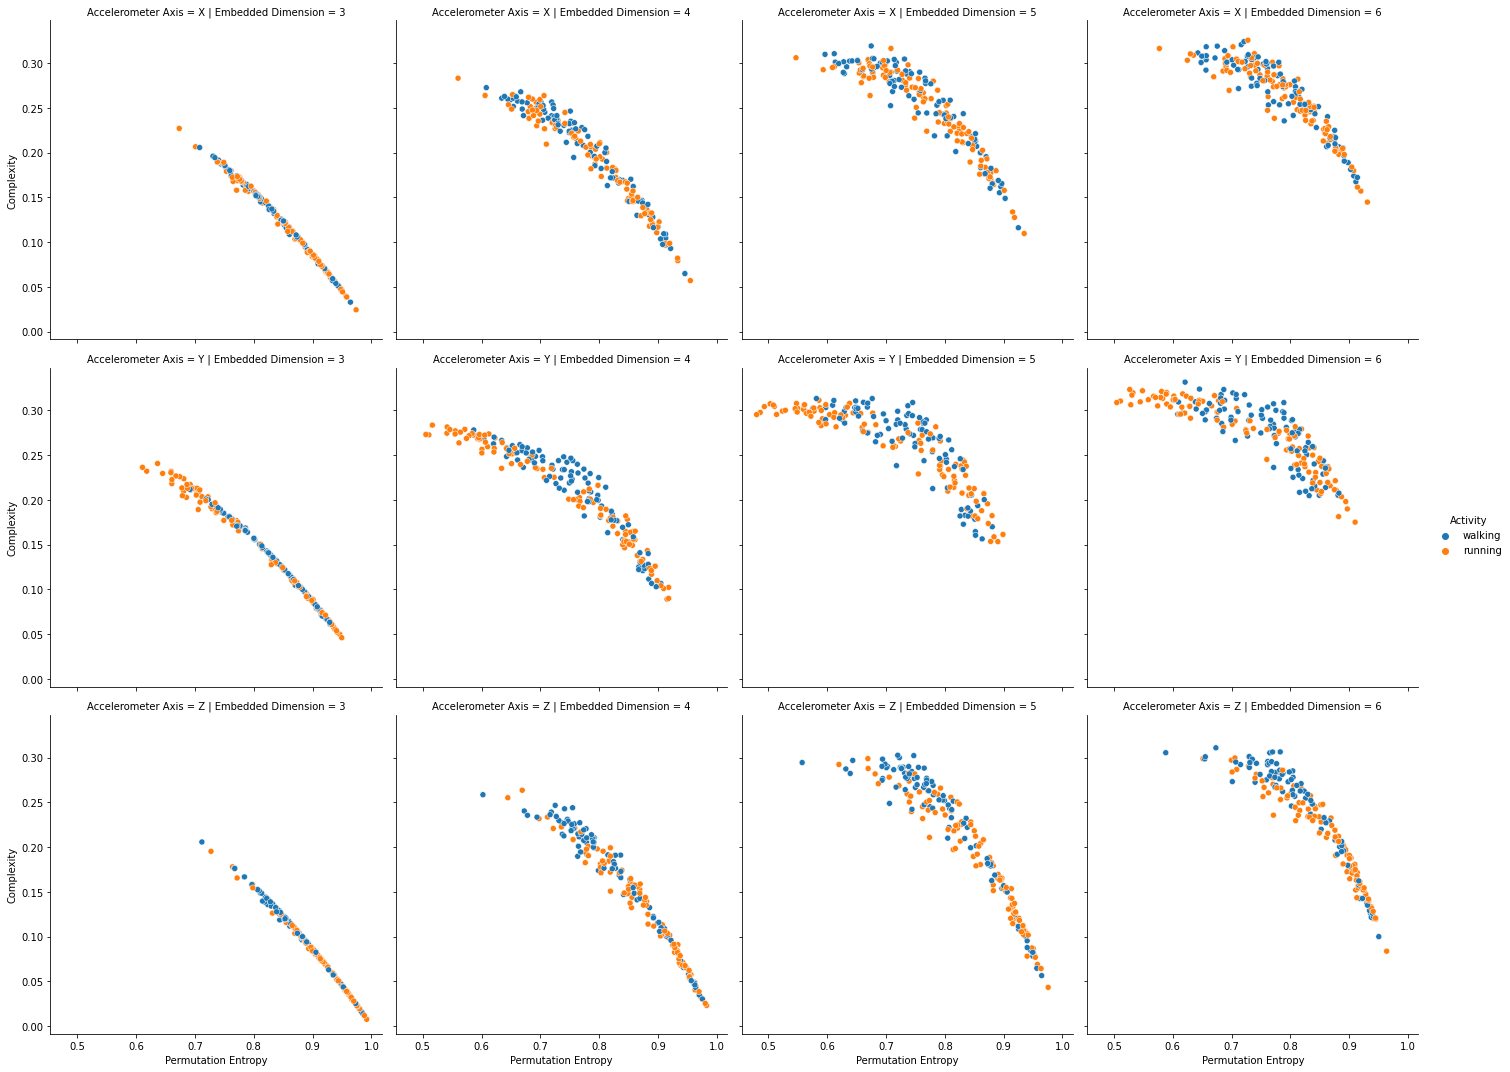

In [38]:
sns.relplot(data = task2_scatter_walk_run, x = "Permutation Entropy", y = "Complexity", row = "Accelerometer Axis", col = "Embedded Dimension",hue = "Activity", kind = "scatter")

### **SCATTER PLOT : CLIMBING UP VS CLIMBING DOWN (SIGNAL LENGTH = 4096, EMBEDDED DELAY =1)**

In [39]:
task2_scatter_up_down = task2_df_final.loc[((task2_df_final['Embedded Delay']==1) & (task2_df_final['Signal Length']==4096) & (task2_df_final['Activity']=="climbingup")) | ((task2_df_final['Embedded Delay']==1) & (task2_df_final['Signal Length']==4096) & (task2_df_final['Activity']=="climbingdown"))]

task2_scatter_up_down

,Subject,Accelerometer Axis,Signal Length,Embedded Dimension,Embedded Delay,Permutation Entropy,Complexity,Activity,Activity Body Part
276,Subject 3,X,4096,3,1,0.804525,0.152638,climbingup,head
279,Subject 3,X,4096,4,1,0.726120,0.216347,climbingup,head
282,Subject 3,X,4096,5,1,0.683050,0.272671,climbingup,head
285,Subject 3,X,4096,6,1,0.699631,0.283827,climbingup,head
312,Subject 3,X,4096,3,1,0.761508,0.179830,climbingup,upperarm
...,...,...,...,...,...,...,...,...,...
18069,Subject 1,Z,4096,6,1,0.741504,0.284349,climbingdown,head
18096,Subject 1,Z,4096,3,1,0.885317,0.098097,climbingdown,upperarm
18099,Subject 1,Z,4096,4,1,0.834747,0.169120,climbingdown,upperarm
18102,Subject 1,Z,4096,5,1,0.807261,0.239228,climbingdown,upperarm


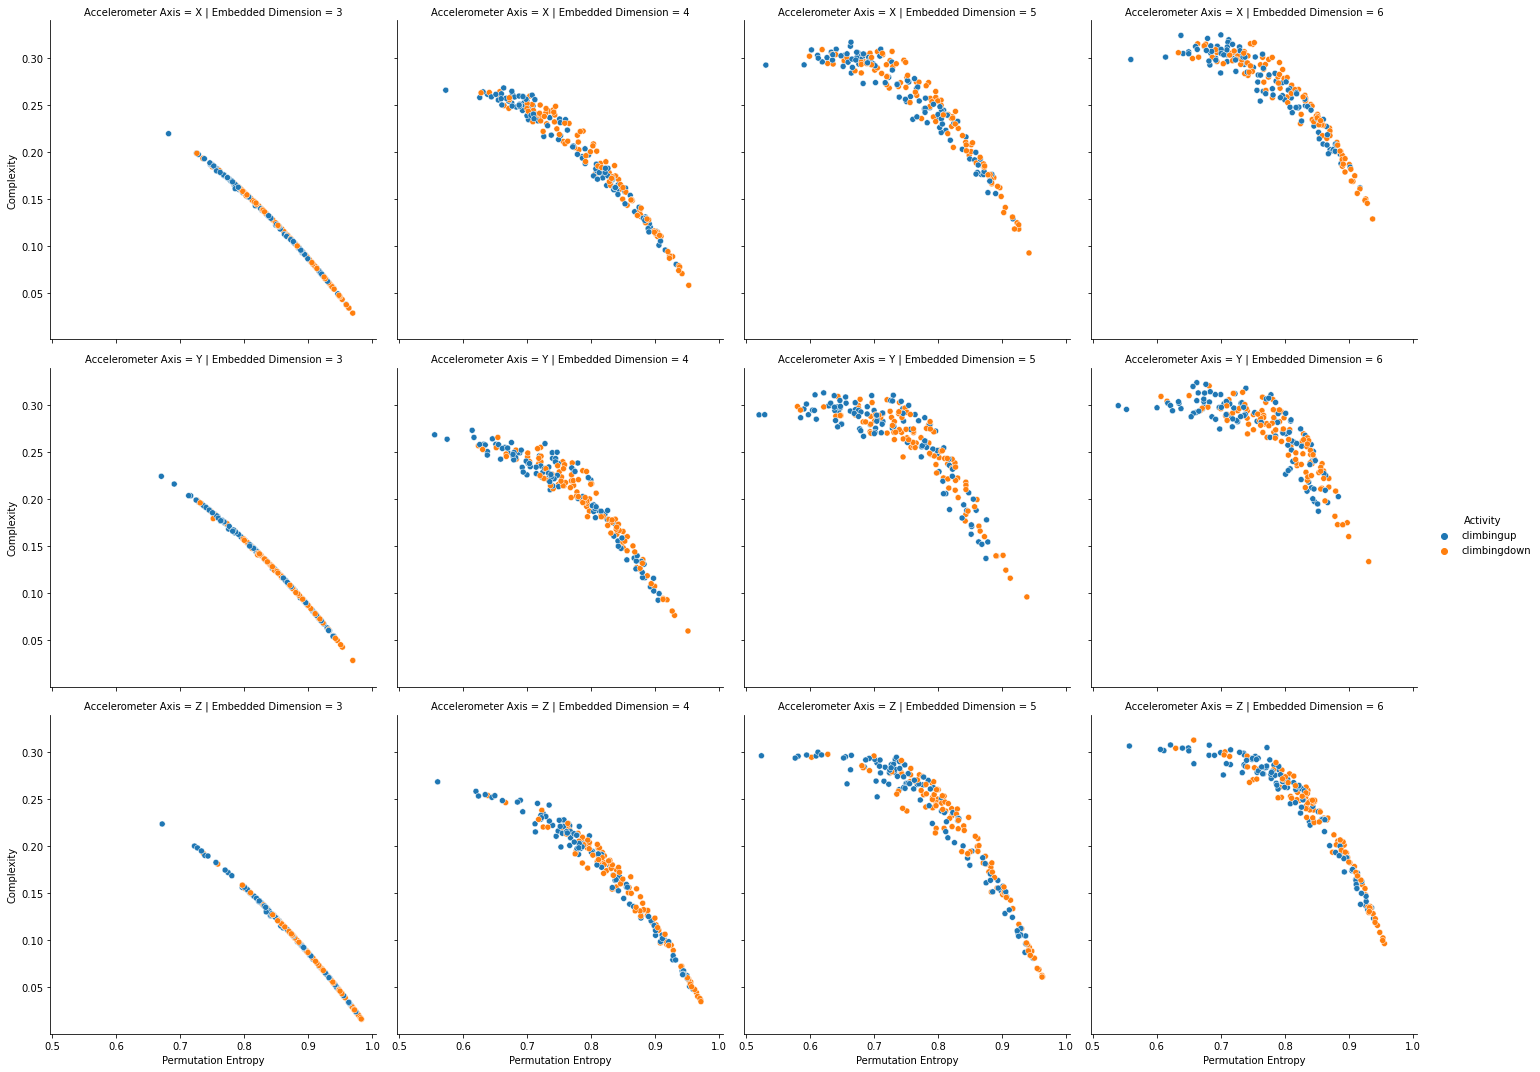

In [40]:
sns.relplot(data = task2_scatter_up_down, x = "Permutation Entropy", y = "Complexity", row = "Accelerometer Axis", col = "Embedded Dimension",hue = "Activity", kind = "scatter")